In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def HL_to_OC(df):
  HL_series = df['<HIGH>'] - df['<LOW>']
  HL = (HL_series.sum())/len(df)
  OC_series = df['<OPEN>'] - df['<CLOSE>']
  for i in range(len(df)):
    val = OC_series.values[i] 
    if val<0:
      OC_series.values[i] = abs(val)
  OC = (OC_series.sum())/len(df)
  HL_OC = HL/OC
  metrics = [HL, OC, HL_OC]
  return metrics

In [ ]:
from google.colab import files
gold_raw = files.upload()

Saving GOLD_M5_202006010100_202006191025.csv to GOLD_M5_202006010100_202006191025.csv


In [ ]:
import io
gold = pd.read_csv(io.BytesIO(gold_raw['GOLD_M5_202006010100_202006191025.csv']), sep='\t') 
gold.head()

In [ ]:
usd_jpy_raw = files.upload()

Saving USDJPY_M5_202006010000_202006191025.csv to USDJPY_M5_202006010000_202006191025.csv


In [ ]:
usd_jpy = pd.read_csv(io.BytesIO(usd_jpy_raw['USDJPY_M5_202006010000_202006191025.csv']), sep='\t')

In [ ]:
usd_jpy_HL, usd_jpy_OC = HL_to_OC(usd_jpy)
usd_jpy_HL, usd_jpy_OC

(0.038224627224627356, 0.02013852813852816)

In [ ]:
usd_cfh_raw = files.upload()

Saving USDCHF_M5_202006010000_202006191025.csv to USDCHF_M5_202006010000_202006191025.csv


In [ ]:
usd_cfh = pd.read_csv(io.BytesIO(usd_cfh_raw['USDCHF_M5_202006010000_202006191025.csv']), sep='\t')

In [ ]:
eur_usd_raw = files.upload()

Saving EURUSD_M5_202006010000_202006191025.csv to EURUSD_M5_202006010000_202006191025.csv


In [ ]:
eur_usd = pd.read_csv(io.BytesIO(eur_usd_raw['EURUSD_M5_202006010000_202006191025.csv']), sep='\t')

In [ ]:
gbp_usd_raw = files.upload()

Saving GBPUSD_M5_202006010000_202006191025.csv to GBPUSD_M5_202006010000_202006191025.csv


In [ ]:
gbp_usd = pd.read_csv(io.BytesIO(gbp_usd_raw['GBPUSD_M5_202006010000_202006191025.csv']), sep='\t')

In [ ]:
len(gbp_usd), len(eur_usd), len(usd_cfh), len(usd_jpy)

(4158, 4158, 4158, 4158)

In [ ]:
compare = pd.DataFrame({'eur_usd': HL_to_OC(eur_usd),
                        'gpb_usd': HL_to_OC(gbp_usd),
                        'usd_jpy': HL_to_OC(usd_jpy),
                        'usd_cfh': HL_to_OC(usd_cfh)
                        })
metrics = compare.T
metrics.columns = ['HL', 'OC', 'HL_OC']
metrics

,HL,OC,HL_OC
eur_usd,0.000494,0.000260,1.899136
gpb_usd,0.000707,0.000370,1.908757
usd_jpy,0.038225,0.020139,1.898084
usd_cfh,0.000335,0.000176,1.899756


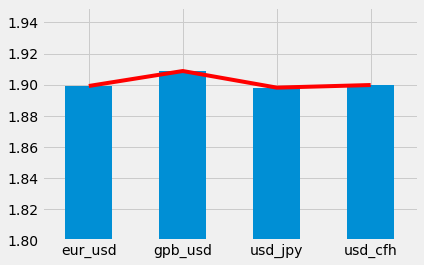

In [ ]:
plt.style.use('fivethirtyeight')
metrics.HL_OC.plot(color='red')
metrics.HL_OC.plot.bar()
plt.ylim(1.8, 1.950)
plt.xticks(rotation=0)
plt.show()